In [8]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import math
import torch.nn.functional as F

In [11]:

a = torch.randint(0,10, (2,3,4))
k,p,q = list(map(int, a.shape))
k,p,q = map(int, a.shape)
print(k, p, q)
# print(k, p, q)

2 3 4


In [2]:
def load_tensor(file):

    with open(file, "rb") as f:
        binary_data = f.read()

    magic_number, ndims, dtype = np.frombuffer(binary_data, np.uint32, count=3, offset=0)
    assert magic_number == 0xFCCFE2E2, f"{file} not a tensor file."

    dims = np.frombuffer(binary_data, np.uint32, count=ndims, offset=3 * 4)

    if dtype == 0:
        np_dtype = np.float32
    elif dtype == 1:
        np_dtype = np.float16
    else:
        assert False, f"Unsupport dtype = {dtype}, can not convert to numpy dtype"

    return np.frombuffer(binary_data, np_dtype, offset=(ndims + 3) * 4).reshape(*dims)

(2048, 2464)


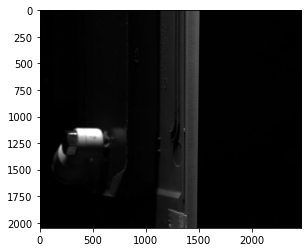

In [3]:
file = r"/media/ps/data/train/LQ/LQ/bdms/bdmask/workspace/imgs/process/2448"
img = load_tensor(file)
im = img[0][0]
plt.imshow(im,cmap="gray")
outpath = r'/media/ps/data/train/LQ/LQ/bdms/bdmask/workspace/imgs/process/2448----.jpg'
plt.imsave(outpath, im, cmap="gray")

print(im.shape)


In [1]:
2048*2048
(3648, 5472)
(3648, 5472)

4194304

In [2]:
def mul(h, w):
    list = [8, 16, 32, 64, 128]
    sum = 0
    for i in list:
        sum += (int(h / i+0.5) * int(w / i+0.5))
    return sum
# mul(2048, 2048)
mul(2048, 2048)

87296

In [ ]:
2048/8 * 2048 /8 + 2048/16 * 2048 /16 + 2048/32 * 2048 /32

In [24]:
int(3648 / 64+0.5) * int(5472/64+0.5)

4902

In [25]:
int(3648 / 16+0.5) * int(5472/16+0.5)

77976

In [22]:
int(3648 / 128+0.5) * int(5472/128+0.5)

1247

In [23]:
3648 / 128

28.5

In [27]:
311904+77976+19494+4902+1247

415523

In [44]:
seed = 123
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)

a = torch.randint(1, 10, (2,3))
a

tensor([[5, 2, 4],
        [1, 2, 6]])

In [45]:
b = torch.randint(1, 10, (2,3))
b

tensor([[1, 3, 6],
        [8, 9, 8]])

In [46]:
a- b

tensor([[ 4, -1, -2],
        [-7, -7, -2]])

In [47]:
torch.sub(a, b)

tensor([[ 4, -1, -2],
        [-7, -7, -2]])

In [48]:
a+b

tensor([[ 6,  5, 10],
        [ 9, 11, 14]])

In [3]:
torch.add(a, b).shape

NameError: name 'a' is not defined

In [21]:
ttt = torch.randint(1, 10, (2,))
ttt = ttt[..., None]
ttt.shape

torch.Size([2, 1])

In [14]:
def compute_locations(h, w, stride, device):
    shifts_x = torch.arange(
        0, w * stride, step=stride,
        dtype=torch.float32, device=device
    )       # [0,8,16,24,...,2040]
    shifts_y = torch.arange(
        0, h * stride, step=stride,
        dtype=torch.float32, device=device
    )       # [0,8,16,24,...,2040]
    shift_y, shift_x = torch.meshgrid(shifts_y, shifts_x)
    shift_x = shift_x.reshape(-1)
    shift_y = shift_y.reshape(-1)
    # print(shift_x)
    # print(shift_y)
    locations = torch.stack((shift_x, shift_y), dim=1) + stride // 2
    return locations

In [19]:
h = 3648
w = 5472
strides = [8,16,32,64,128]
device = "cuda:3"
for stride in strides:
    h_step = math.ceil(h / stride)
    w_step = math.ceil(w / stride)
    locations = compute_locations(h_step, w_step, stride, device)
    print(h_step, w_step, stride, locations.shape)
    print(locations[:15])


456 684 8 torch.Size([311904, 2])
tensor([[  4.,   4.],
        [ 12.,   4.],
        [ 20.,   4.],
        [ 28.,   4.],
        [ 36.,   4.],
        [ 44.,   4.],
        [ 52.,   4.],
        [ 60.,   4.],
        [ 68.,   4.],
        [ 76.,   4.],
        [ 84.,   4.],
        [ 92.,   4.],
        [100.,   4.],
        [108.,   4.],
        [116.,   4.]], device='cuda:3')
228 342 16 torch.Size([77976, 2])
tensor([[  8.,   8.],
        [ 24.,   8.],
        [ 40.,   8.],
        [ 56.,   8.],
        [ 72.,   8.],
        [ 88.,   8.],
        [104.,   8.],
        [120.,   8.],
        [136.,   8.],
        [152.,   8.],
        [168.,   8.],
        [184.,   8.],
        [200.,   8.],
        [216.,   8.],
        [232.,   8.]], device='cuda:3')
114 171 32 torch.Size([19494, 2])
tensor([[ 16.,  16.],
        [ 48.,  16.],
        [ 80.,  16.],
        [112.,  16.],
        [144.,  16.],
        [176.,  16.],
        [208.,  16.],
        [240.,  16.],
        [272.,  16.],
    

In [33]:
shifts_y = torch.tensor([3,4,5,6,7])
shifts_x = torch.tensor([2,3,3,4])
yx, xy = torch.meshgrid(shifts_y, shifts_x)

shift_x = xy.reshape(-1)
shift_y = yx.reshape(-1)
print(yx.shape, xy.shape)
locations = torch.stack((shift_x, shift_y), dim=1) + stride // 2
print(yx, xy, locations.shape)

torch.Size([5, 4]) torch.Size([5, 4])
tensor([[3, 3, 3, 3],
        [4, 4, 4, 4],
        [5, 5, 5, 5],
        [6, 6, 6, 6],
        [7, 7, 7, 7]]) tensor([[2, 3, 3, 4],
        [2, 3, 3, 4],
        [2, 3, 3, 4],
        [2, 3, 3, 4],
        [2, 3, 3, 4]]) torch.Size([20, 2])


In [16]:
import torch
from glob import glob
import os.path as osp
import imagesize

In [19]:
src = r"/media/ps/data/train/LQ/LQ/bdms/yolov7/datasets/coco128/images/train"
imps = glob(src + "/*.jpg")
dic = []
for idx, imp in enumerate(imps):
    # print(imagesize.get(imp))
    h, w  = imagesize.get(imp)
    dic.append({
        "filename":imp,
        "height":h,
        "width":w
    })
dataloader = torch.utils.data.DataLoader(dic)
print(dataloader)
for datas in dataloader:
    print(datas)

{'filename': ['/media/ps/data/train/LQ/LQ/bdms/yolov7/datasets/coco128/images/train/000000000490.jpg'], 'height': tensor([500]), 'width': tensor([495])}
{'filename': ['/media/ps/data/train/LQ/LQ/bdms/yolov7/datasets/coco128/images/train/000000000154.jpg'], 'height': tensor([427]), 'width': tensor([640])}
{'filename': ['/media/ps/data/train/LQ/LQ/bdms/yolov7/datasets/coco128/images/train/000000000370.jpg'], 'height': tensor([480]), 'width': tensor([640])}
{'filename': ['/media/ps/data/train/LQ/LQ/bdms/yolov7/datasets/coco128/images/train/000000000589.jpg'], 'height': tensor([640]), 'width': tensor([480])}
{'filename': ['/media/ps/data/train/LQ/LQ/bdms/yolov7/datasets/coco128/images/train/000000000564.jpg'], 'height': tensor([520]), 'width': tensor([640])}
{'filename': ['/media/ps/data/train/LQ/LQ/bdms/yolov7/datasets/coco128/images/train/000000000544.jpg'], 'height': tensor([640]), 'width': tensor([427])}
{'filename': ['/media/ps/data/train/LQ/LQ/bdms/yolov7/datasets/coco128/images/trai

In [20]:
torch.manual_seed(0)
a = torch.randint(1, 10, (1,1,2,4), dtype=torch.float32)
coeffs = F.interpolate(a, scale_factor=4,
                            mode='bilinear', align_corners=False)


print(a[0,0,0], "\n",coeffs[0,0,0], a.shape, coeffs.shape)

tensor([9., 1., 3., 7.]) 
 tensor([9.0000, 9.0000, 8.0000, 6.0000, 4.0000, 2.0000, 1.2500, 1.7500, 2.2500,
        2.7500, 3.5000, 4.5000, 5.5000, 6.5000, 7.0000, 7.0000]) torch.Size([1, 1, 2, 4]) torch.Size([1, 1, 8, 16])
